In [1]:
using Revise

In [2]:
using MeshCatMechanisms
using MeshCat
using RigidBodyDynamics
using Flux
using ProgressMeter
using MLDataPattern
using JLD2
using Plots; gr()
using LCPSim
using LearningMPC
using LearningMPC.Models

INFO: Recompiling stale cache file /home/rdeits/locomotion/explorations/learning-mpc-2/packages/lib/v0.6/LearningMPC.ji for module LearningMPC.


In [3]:
robot = CartPole()
mvis = MechanismVisualizer(robot)
IJuliaCell(mvis)

Listening on 127.0.0.1:7007...
zmq_url=tcp://127.0.0.1:6007
web_url=http://127.0.0.1:7007/static/


MeshCat.IJuliaCell(MeshCat.ViewerWindow(ZMQ.Context(Ptr{Void} @0x0000000006ff0070, ZMQ.Socket[ZMQ.Socket(Ptr{Void} @0x00000000070728c0, Base.Filesystem._FDWatcher(Ptr{Void} @0x00000000070550d0, 69, (1, 0), Condition(Any[]), (false, false), 0))]), ZMQ.Socket(Ptr{Void} @0x00000000070728c0, Base.Filesystem._FDWatcher(Ptr{Void} @0x00000000070550d0, 69, (1, 0), Condition(Any[]), (false, false), 0)), "http://127.0.0.1:7007/static/", "tcp://127.0.0.1:6007", MeshCat.ZMQServer.ZMQWebSocketBridge(ip"127.0.0.1", Set{WebSockets.WebSocket}(), MeshCat.SceneTrees.SceneNode(Nullable{Array{UInt8,1}}(), Nullable{Array{UInt8,1}}(), Dict("meshcat"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0xa8, 0x2f, 0x6d, 0x65, 0x73, 0x68, 0x63, 0x61, 0x74], Dict("world"=>MeshCat.SceneTrees.SceneNode(#NULL, #NULL, Dict("slideBar"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x64, 0x2f, 0x73, 0x6c, 0x69, 0x64, 0x65, 0x42, 0x61, 0x72], Dict("slideBar"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x72, 0x2f, 0x73, 0x6c, 0x69, 0x64, 0x65, 0x42, 0x61, 0x72], Dict("geometry_1"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], Dict{String,MeshCat.SceneTrees.SceneNode}()))),"left_wall"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x2f, 0x6c, 0x65, 0x66, 0x74, 0x5f, 0x77, 0x61, 0x6c, 0x6c], Dict("after_slide_to_left_wall"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x6c, 0x65, 0x66, 0x74, 0x5f, 0x77, 0x61, 0x6c, 0x6c], Dict("geometry_5"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x35], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x35], Dict{String,MeshCat.SceneTrees.SceneNode}()))))),"right_wall"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x72, 0x69, 0x67, 0x68, 0x74, 0x5f, 0x77, 0x61, 0x6c, 0x6c], Dict("after_slide_to_right_wall"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x72, 0x69, 0x67, 0x68, 0x74, 0x5f, 0x77, 0x61, 0x6c, 0x6c], Dict("geometry_6"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x36], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x36], Dict{String,MeshCat.SceneTrees.SceneNode}()))))),"cart"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x64, 0x65, 0x42, 0x61, 0x72, 0x2f, 0x63, 0x61, 0x72, 0x74], Dict("pole"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x2f, 0x63, 0x61, 0x72, 0x74, 0x2f, 0x70, 0x6f, 0x6c, 0x65], Dict("after_cart_to_pole"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x72, 0x74, 0x5f, 0x74, 0x6f, 0x5f, 0x70, 0x6f, 0x6c, 0x65], Dict("geometry_3"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], Dict{String,MeshCat.SceneTrees.SceneNode}()),"geometry_4"=>MeshCat.SceneTrees.SceneNode(UInt8

In [17]:
params = MPCParams(robot)
lqrsol = LQRSolution(robot, params)
net, loss = LearningMPC.interval_net([4, 32, 32, 1])
optimizer = Flux.ADAM(Flux.params(net))

net_cost = LearningMPC.LearnedCost(lqrsol, net)

net_mpc_params = MPCParams(robot)
net_mpc_params.horizon = 1
net_mpc_controller = MPCController(robot, net_mpc_params, net_cost, [lqrsol]);

full_mpc_controller = MPCController(robot, params, lqrsol, [lqrsol, net_mpc_controller]);

In [18]:
sample_sink = LearningMPC.MPCSampleSink{Float64}(true)
playback_sink = LearningMPC.PlaybackSink(mvis, params.Δt)

full_mpc_controller.callback = LearningMPC.call_each(
    sample_sink,
#     playback_sink,
)

live_viewer = LearningMPC.live_viewer(mvis)

dagger_controller = LearningMPC.call_each(
    LearningMPC.dagger_controller(
        full_mpc_controller,
        net_mpc_controller,
        0.2),
    live_viewer
    )

dataset = LearningMPC.Dataset(lqrsol)

x_init = nominal_state(robot)

function collect_into!(data::Vector{<:LearningMPC.Sample})
    empty!(sample_sink)
    LearningMPC.randomize!(x0, x_init, 0.0, 1.0)
    results = LCPSim.simulate(x0, 
        dagger_controller,
        robot.environment, params.Δt, 100, 
        params.lcp_solver;
        termination=x -> configuration(x)[2] > π/2 || configuration(x)[2] < -π/2);
    append!(data, sample_sink.samples)
end

x0 = MechanismState{Float64}(robot.mechanism)

features(s::LearningMPC.Sample) = (s.state, s.mip.objective_bound, s.mip.objective_value)

features (generic function with 1 method)

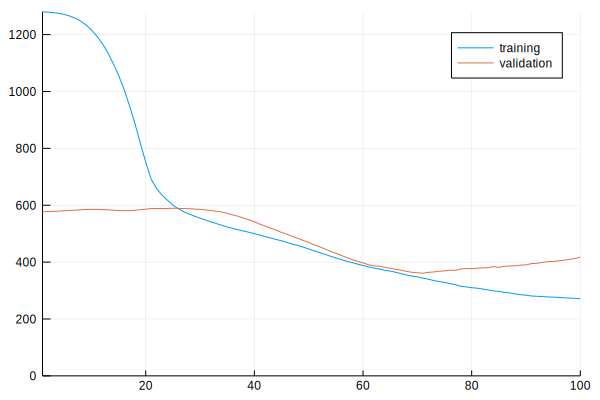

  1.520153 seconds (1.67 M allocations: 109.330 MiB, 3.74% gc time)


Progress:   2%|█                                        |  ETA: 1:12:20

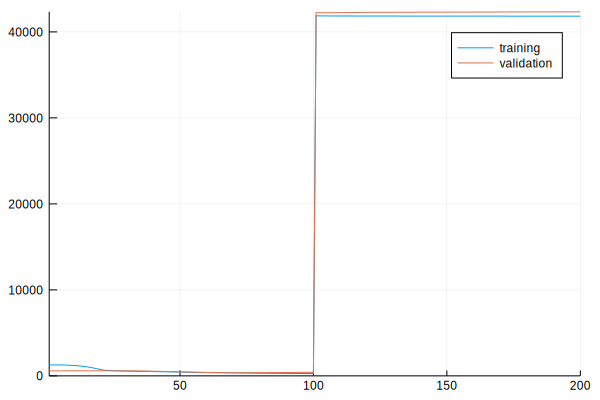

  1.941538 seconds (2.43 M allocations: 159.084 MiB, 3.43% gc time)


Progress:   4%|██                                       |  ETA: 0:45:44

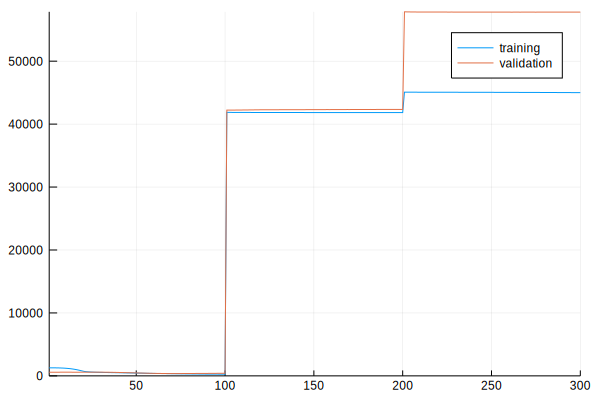

  2.950777 seconds (3.68 M allocations: 240.828 MiB, 3.48% gc time)


Progress:   6%|██                                       |  ETA: 0:42:15

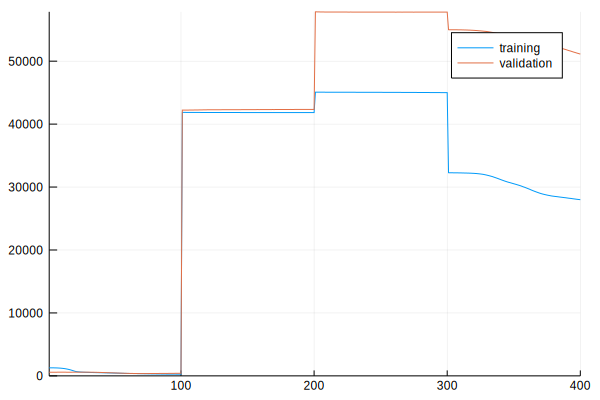

  4.307634 seconds (5.48 M allocations: 357.259 MiB, 3.42% gc time)


Progress:   8%|███                                      |  ETA: 0:54:43

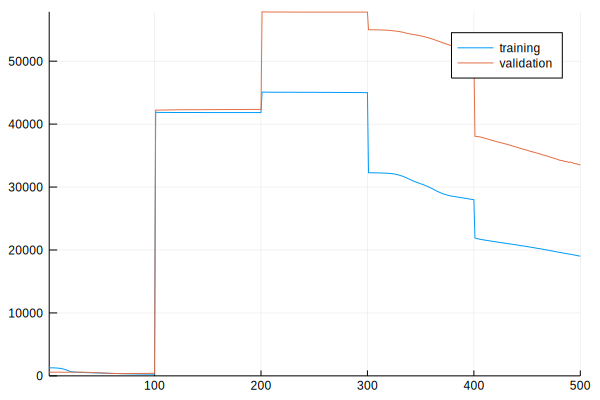

  5.781871 seconds (7.46 M allocations: 486.426 MiB, 3.37% gc time)


Progress:  10%|████                                     |  ETA: 0:52:23

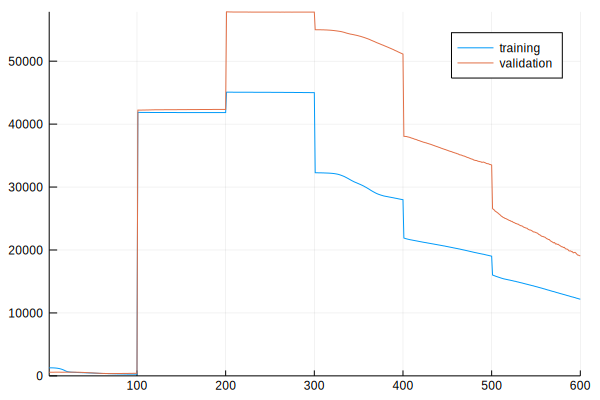

  7.291160 seconds (9.22 M allocations: 601.929 MiB, 3.34% gc time)


Progress:  12%|█████                                    |  ETA: 1:13:12

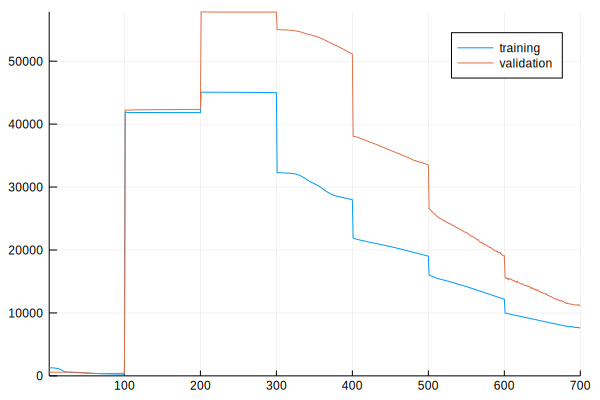

  8.920384 seconds (11.34 M allocations: 740.334 MiB, 3.36% gc time)


Progress:  14%|██████                                   |  ETA: 1:11:48

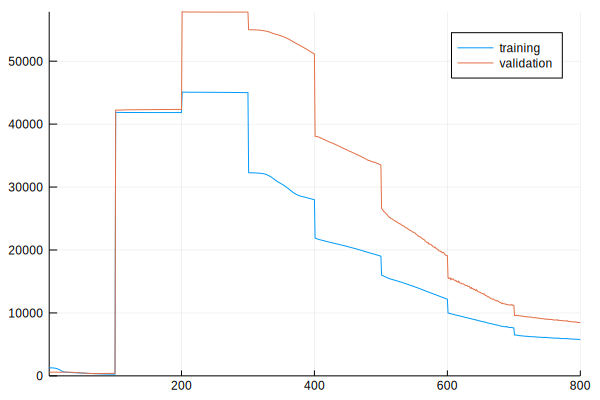

 10.443420 seconds (13.70 M allocations: 893.796 MiB, 2.47% gc time)


Progress:  16%|███████                                  |  ETA: 1:14:07

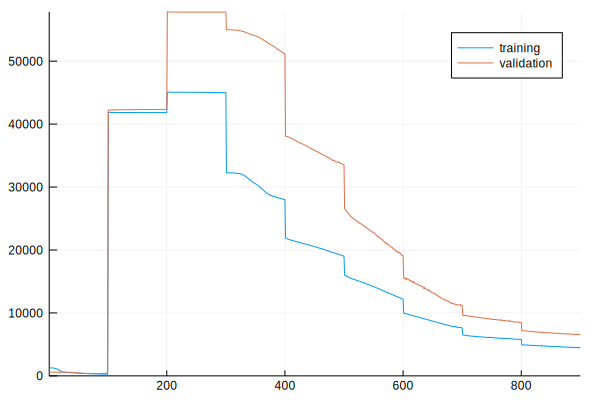

 12.490705 seconds (16.19 M allocations: 1.031 GiB, 2.62% gc time)


Progress:  18%|███████                                  |  ETA: 1:20:15

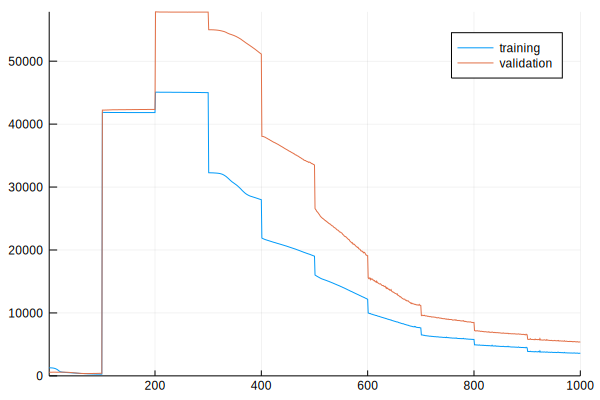

 14.462606 seconds (18.84 M allocations: 1.200 GiB, 2.64% gc time)


Progress:  20%|████████                                 |  ETA: 1:20:06

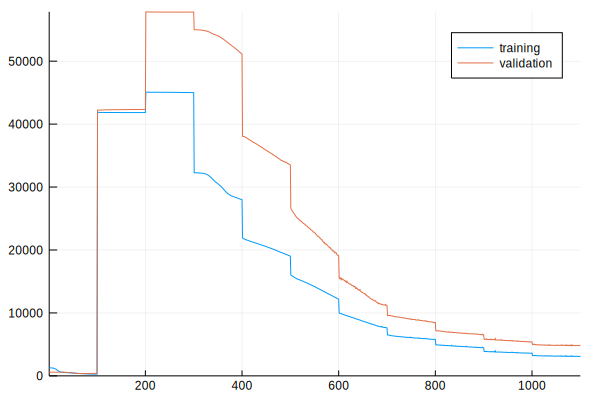

 16.225207 seconds (21.20 M allocations: 1.349 GiB, 2.76% gc time)


Progress:  22%|█████████                                |  ETA: 1:17:04

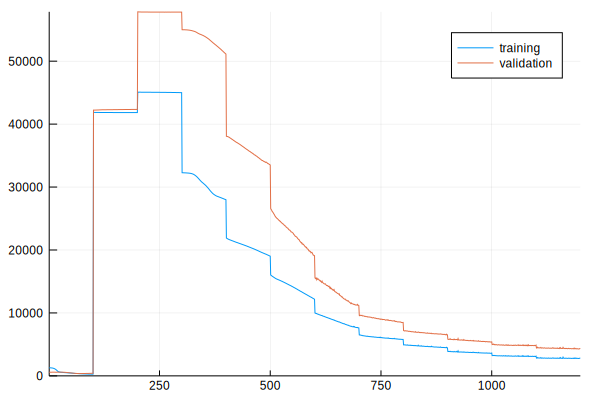

 17.908683 seconds (23.32 M allocations: 1.484 GiB, 2.83% gc time)


Progress:  24%|██████████                               |  ETA: 1:17:42

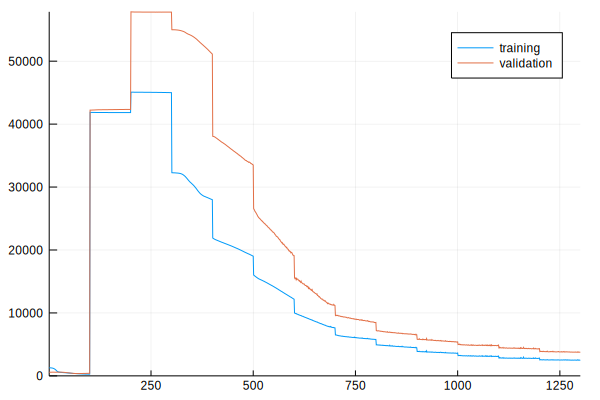

 19.861036 seconds (25.87 M allocations: 1.646 GiB, 2.97% gc time)


Progress:  26%|███████████                              |  ETA: 1:16:50

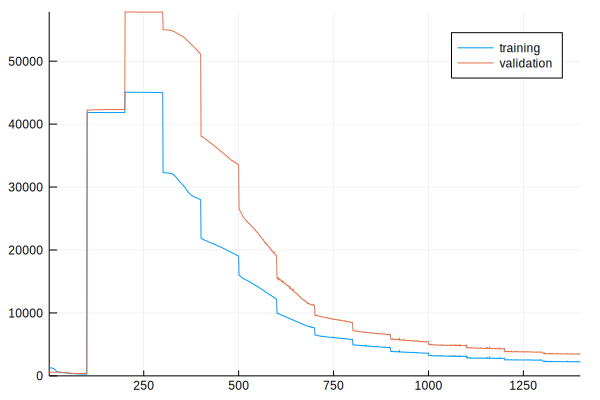

 22.237624 seconds (28.83 M allocations: 1.833 GiB, 3.15% gc time)


Progress:  28%|███████████                              |  ETA: 1:12:15

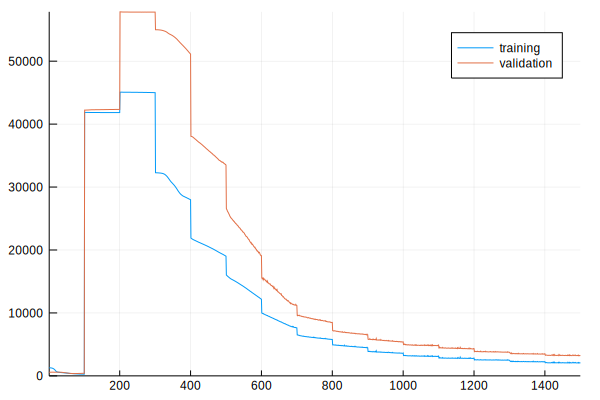

 24.138544 seconds (31.10 M allocations: 1.977 GiB, 3.31% gc time)


Progress:  30%|████████████                             |  ETA: 1:08:59

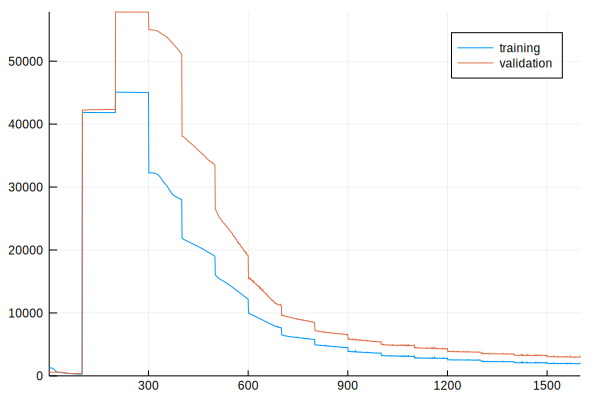

 26.127303 seconds (33.59 M allocations: 2.136 GiB, 3.43% gc time)


Progress:  32%|█████████████                            |  ETA: 1:07:29

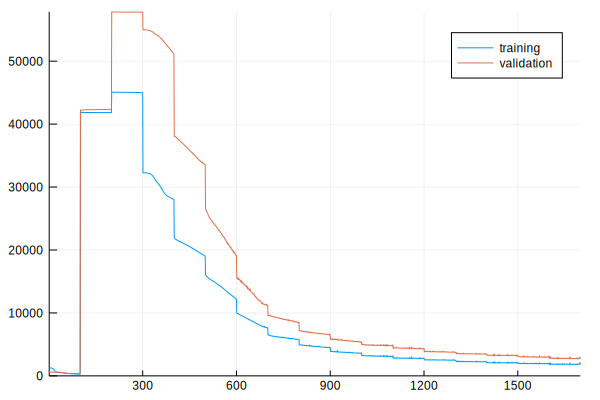

 27.724109 seconds (35.64 M allocations: 2.266 GiB, 3.48% gc time)


Progress:  34%|██████████████                           |  ETA: 1:03:51

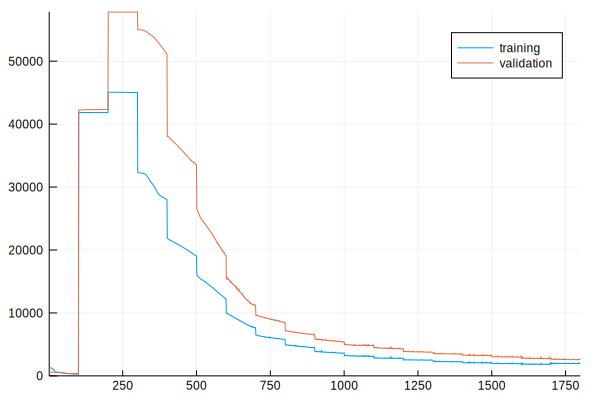

 29.295001 seconds (37.74 M allocations: 2.399 GiB, 3.57% gc time)


Progress:  36%|███████████████                          |  ETA: 1:00:34

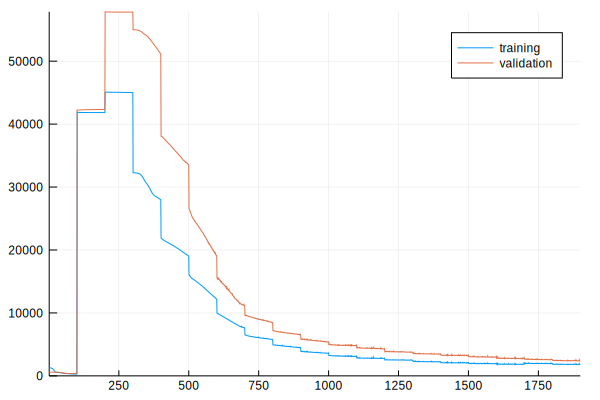

 31.359126 seconds (40.47 M allocations: 2.573 GiB, 3.59% gc time)


Progress:  38%|████████████████                         |  ETA: 0:57:28

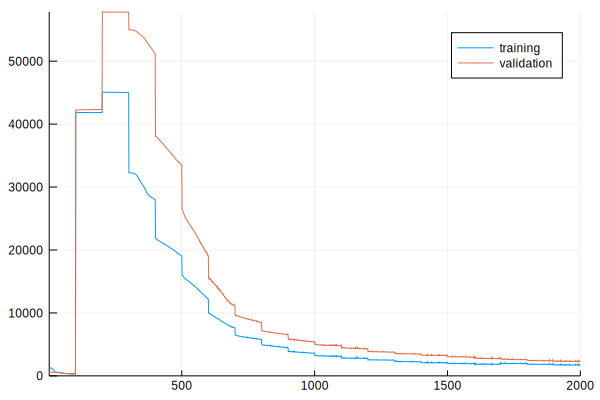

 33.450819 seconds (42.80 M allocations: 2.720 GiB, 3.59% gc time)


Progress:  40%|████████████████                         |  ETA: 0:54:33

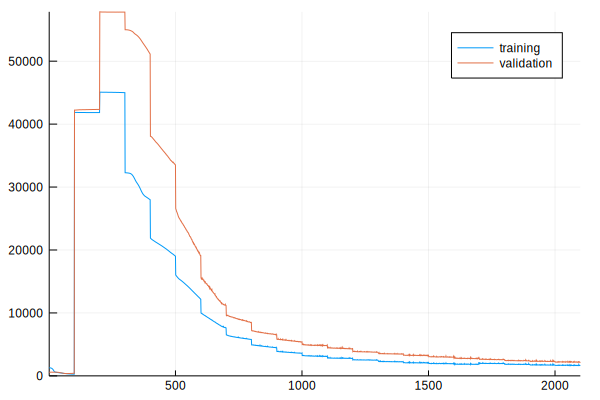

 35.132254 seconds (44.89 M allocations: 2.853 GiB, 3.56% gc time)


Progress:  42%|█████████████████                        |  ETA: 0:51:57

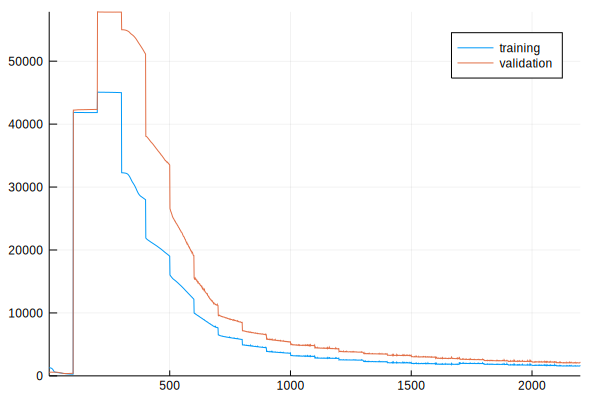

 36.422230 seconds (47.01 M allocations: 2.988 GiB, 3.54% gc time)


Progress:  44%|██████████████████                       |  ETA: 0:49:59

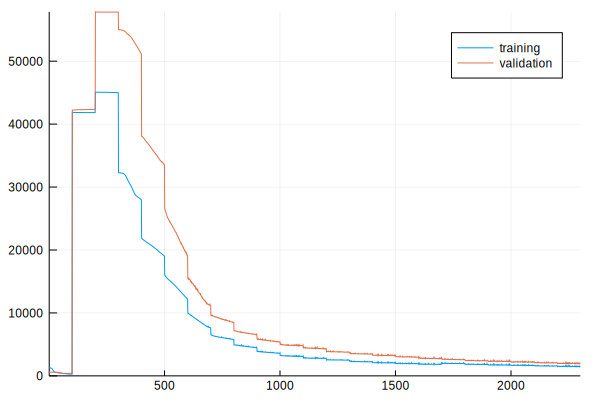

 38.944878 seconds (49.76 M allocations: 3.163 GiB, 3.49% gc time)


Progress:  46%|███████████████████                      |  ETA: 0:47:41

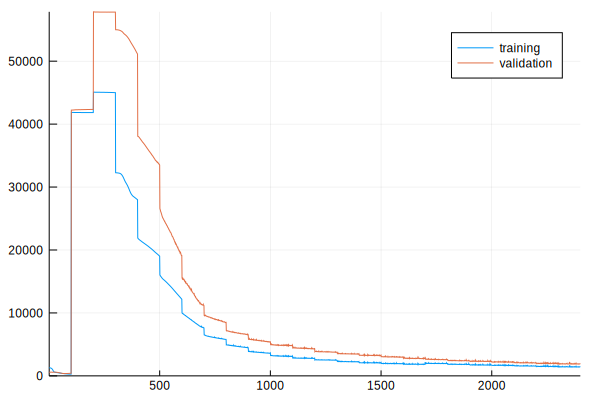

 40.400431 seconds (51.88 M allocations: 3.298 GiB, 3.46% gc time)


Progress:  48%|████████████████████                     |  ETA: 0:45:22

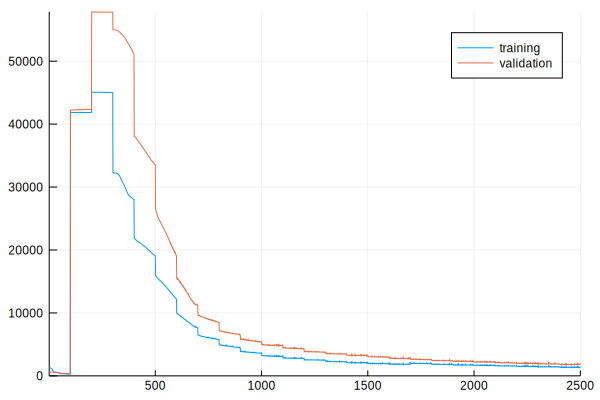

 42.252580 seconds (54.39 M allocations: 3.458 GiB, 3.38% gc time)


Progress:  50%|████████████████████                     |  ETA: 0:44:28

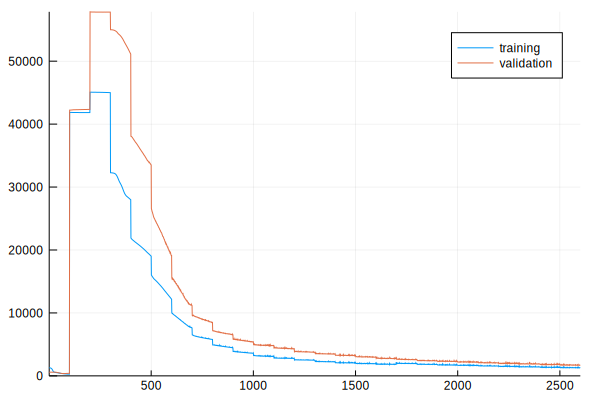

 44.151181 seconds (56.61 M allocations: 3.600 GiB, 3.32% gc time)


Progress:  52%|█████████████████████                    |  ETA: 0:42:52

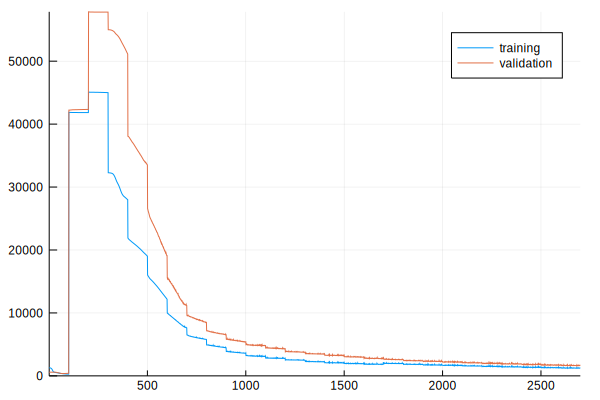

 45.006484 seconds (58.97 M allocations: 3.749 GiB, 2.49% gc time)


Progress:  54%|██████████████████████                   |  ETA: 0:40:48

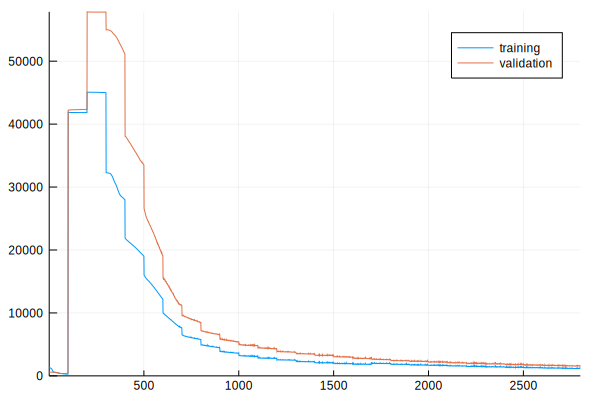

 47.485034 seconds (62.02 M allocations: 3.943 GiB, 2.61% gc time)


Progress:  56%|███████████████████████                  |  ETA: 0:38:44

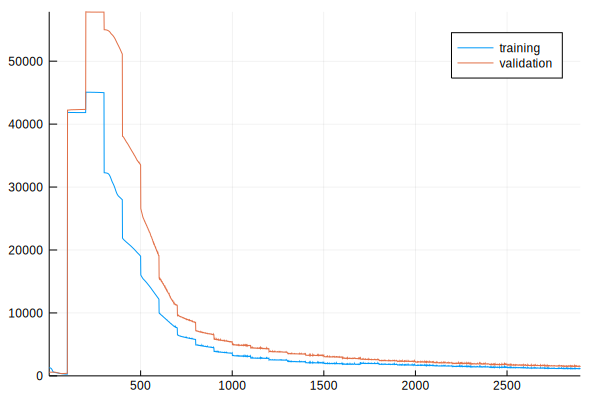

 49.065737 seconds (63.93 M allocations: 4.065 GiB, 2.67% gc time)


Progress:  58%|████████████████████████                 |  ETA: 0:36:48

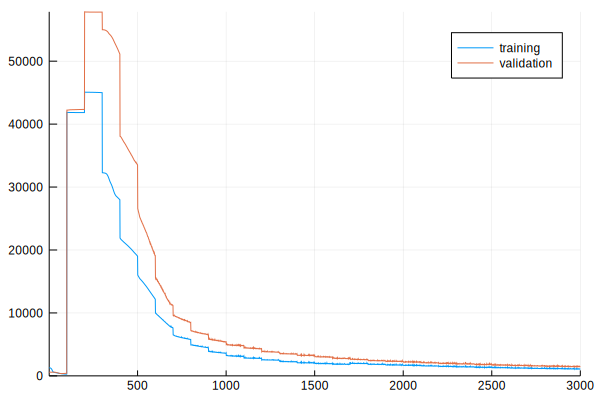

 51.081298 seconds (66.65 M allocations: 4.238 GiB, 2.74% gc time)


Progress:  60%|█████████████████████████                |  ETA: 0:36:19

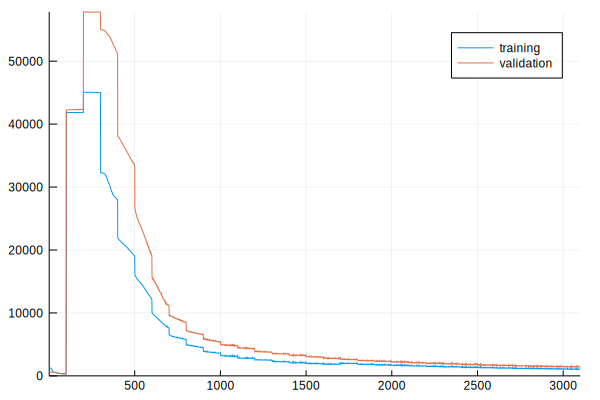

 52.426474 seconds (68.34 M allocations: 4.346 GiB, 2.84% gc time)


Progress:  62%|█████████████████████████                |  ETA: 0:35:06

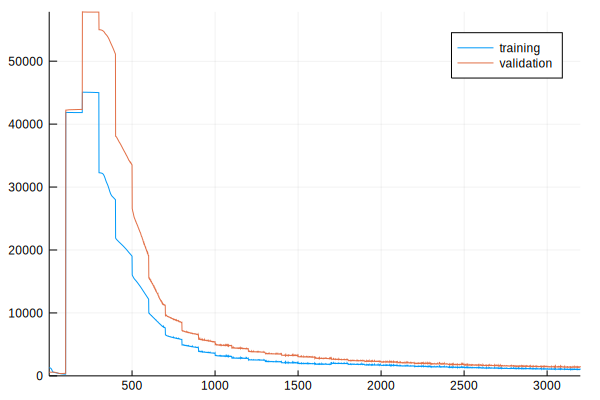

 54.084049 seconds (70.39 M allocations: 4.477 GiB, 2.94% gc time)


Progress:  64%|██████████████████████████               |  ETA: 0:34:41

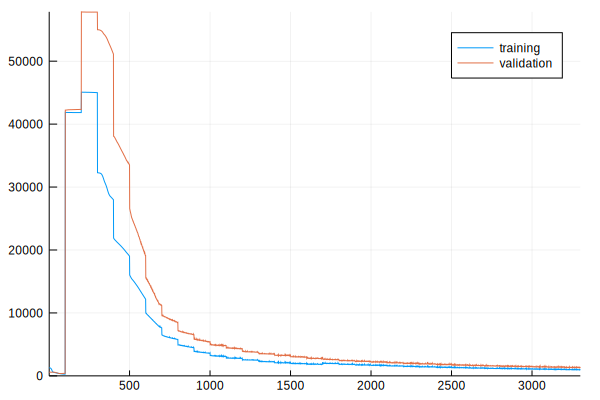

 56.288383 seconds (72.48 M allocations: 4.610 GiB, 3.07% gc time)


Progress:  66%|███████████████████████████              |  ETA: 0:33:04

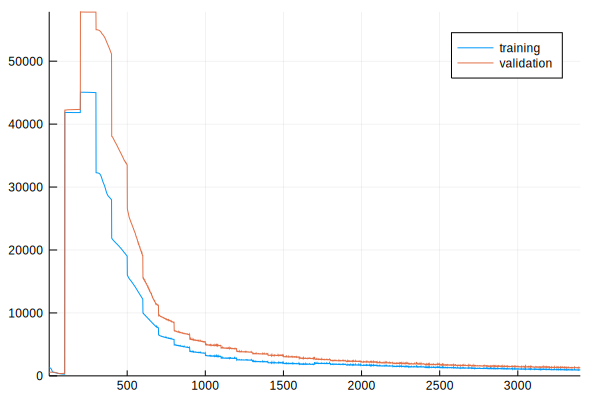

 57.576926 seconds (74.58 M allocations: 4.745 GiB, 3.20% gc time)


Progress:  68%|████████████████████████████             |  ETA: 0:31:02

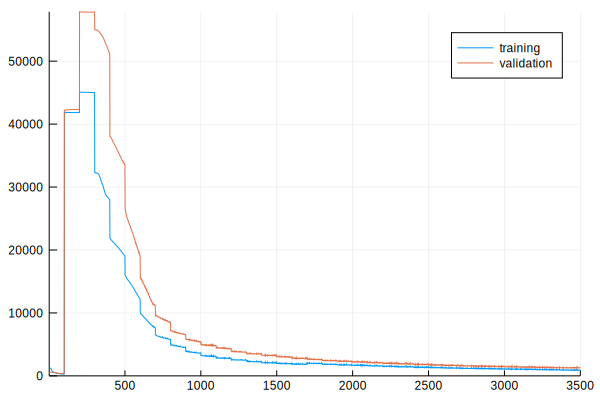

 59.608474 seconds (77.05 M allocations: 4.901 GiB, 3.33% gc time)


Progress:  70%|█████████████████████████████            |  ETA: 0:28:54

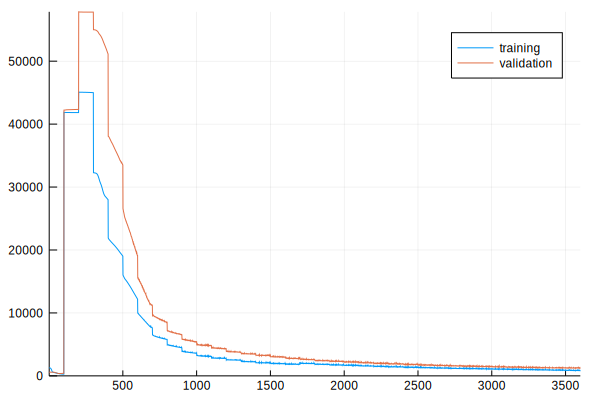

 61.749229 seconds (79.40 M allocations: 5.051 GiB, 3.44% gc time)


Progress:  72%|██████████████████████████████           |  ETA: 0:26:49

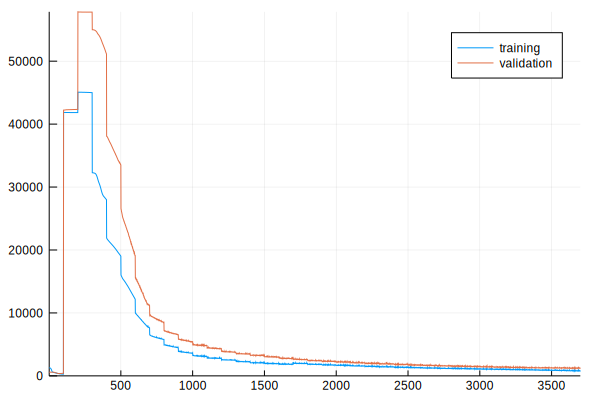

 64.284571 seconds (82.67 M allocations: 5.258 GiB, 3.55% gc time)


Progress:  74%|██████████████████████████████           |  ETA: 0:24:57

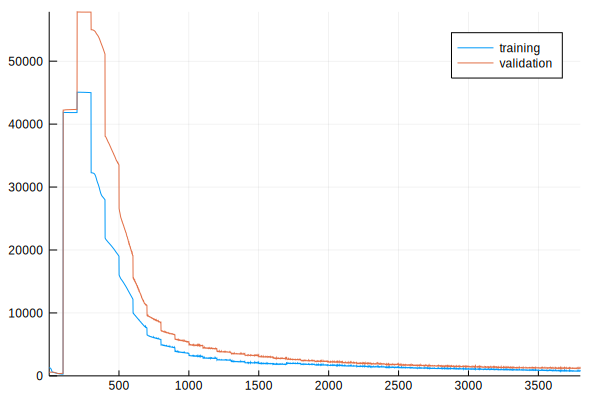

 66.706207 seconds (85.48 M allocations: 5.436 GiB, 3.62% gc time)


Progress:  76%|███████████████████████████████          |  ETA: 0:23:23

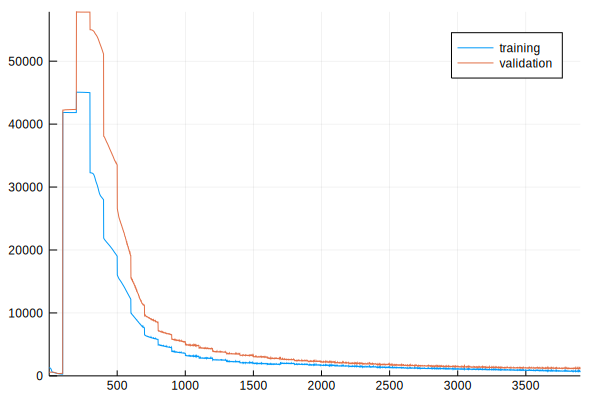

 68.638132 seconds (87.85 M allocations: 5.587 GiB, 3.64% gc time)


Progress:  78%|████████████████████████████████         |  ETA: 0:21:21

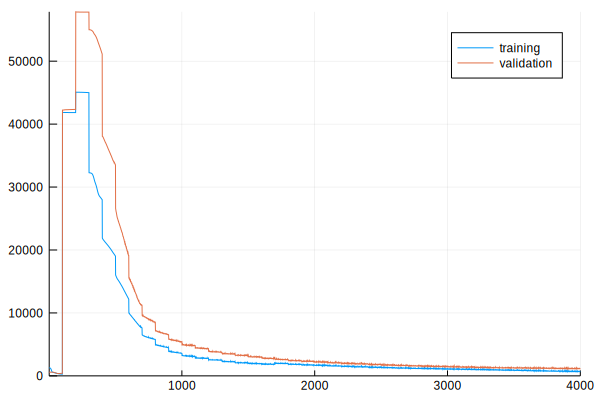

 70.650264 seconds (90.94 M allocations: 5.783 GiB, 3.65% gc time)


Progress:  80%|█████████████████████████████████        |  ETA: 0:19:37

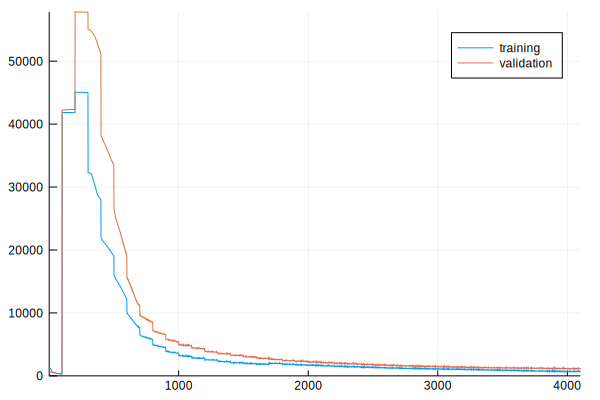

 72.412525 seconds (93.54 M allocations: 5.949 GiB, 3.62% gc time)


Progress:  82%|██████████████████████████████████       |  ETA: 0:17:45

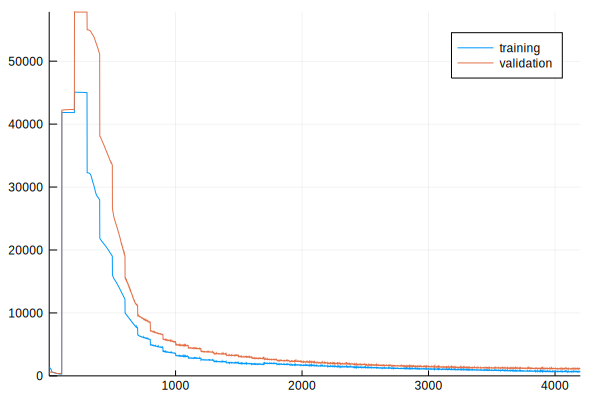

 74.207651 seconds (95.67 M allocations: 6.084 GiB, 3.59% gc time)


Progress:  84%|██████████████████████████████████       |  ETA: 0:15:58

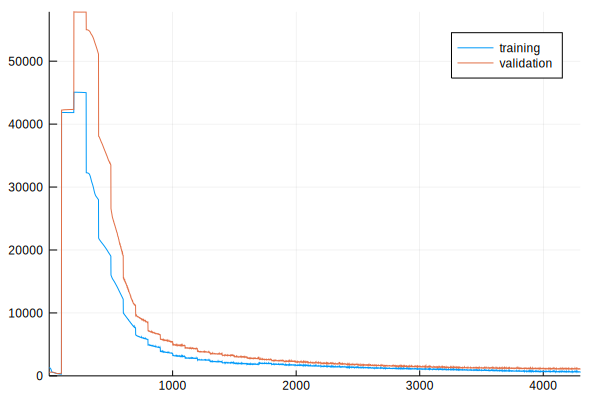

 74.883490 seconds (97.68 M allocations: 6.212 GiB, 2.51% gc time)


Progress:  86%|███████████████████████████████████      |  ETA: 0:13:56

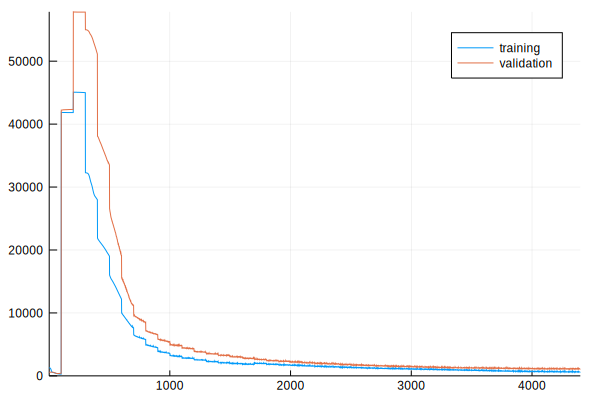

 76.618333 seconds (99.97 M allocations: 6.358 GiB, 2.59% gc time)


Progress:  88%|████████████████████████████████████     |  ETA: 0:11:58

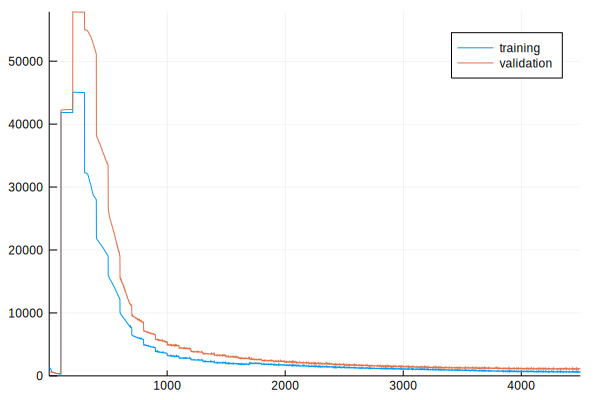

 78.822575 seconds (102.99 M allocations: 6.549 GiB, 2.69% gc time)


Progress:  90%|█████████████████████████████████████    |  ETA: 0:10:01

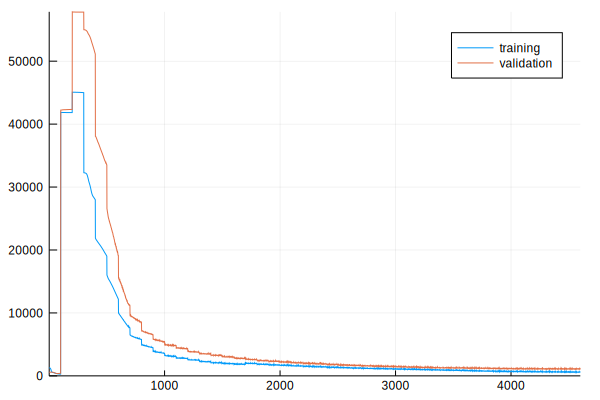

 80.528313 seconds (105.20 M allocations: 6.689 GiB, 2.77% gc time)


Progress:  92%|██████████████████████████████████████   |  ETA: 0:08:00

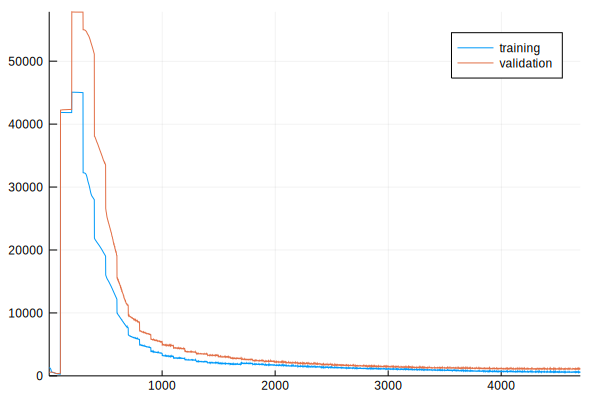

 82.666901 seconds (107.24 M allocations: 6.819 GiB, 2.88% gc time)


Progress:  94%|███████████████████████████████████████  |  ETA: 0:06:00

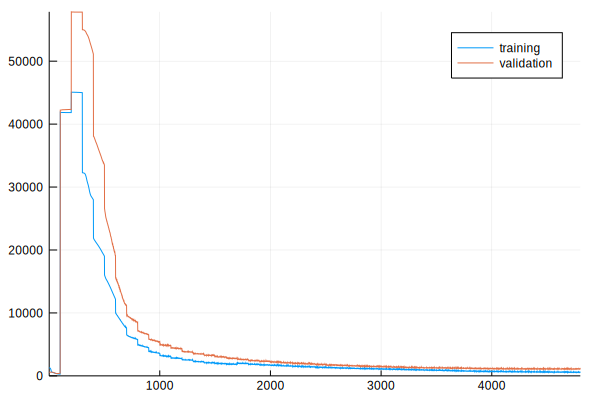

 84.363932 seconds (109.79 M allocations: 6.980 GiB, 3.05% gc time)


Progress:  96%|███████████████████████████████████████  |  ETA: 0:04:02

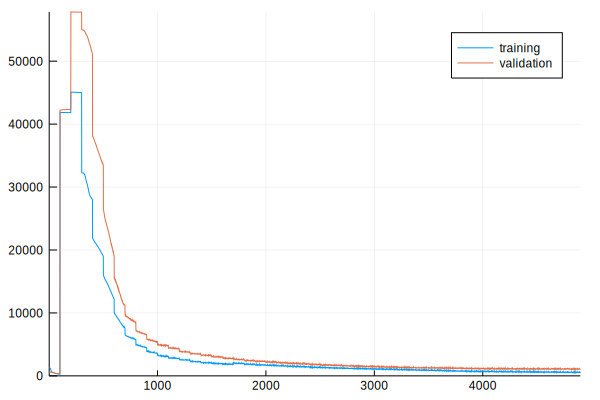

 86.887265 seconds (112.54 M allocations: 7.155 GiB, 3.22% gc time)


Progress:  98%|████████████████████████████████████████ |  ETA: 0:02:01

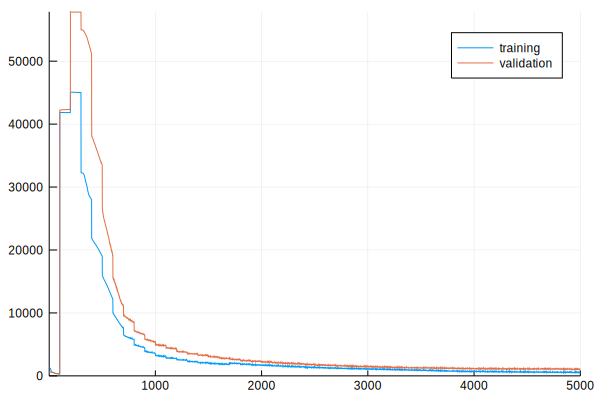

 88.900943 seconds (114.83 M allocations: 7.301 GiB, 3.35% gc time)


Progress: 100%|█████████████████████████████████████████| Time: 1:41:09


In [19]:
datasets = Vector{LearningMPC.Dataset{Float64}}()
all_training_data = Vector{Tuple{Vector{Float64}, Float64, Float64}}()
all_validation_data = Vector{Tuple{Vector{Float64}, Float64, Float64}}()
losses = Vector{Tuple{Float64, Float64}}()

@showprogress for i in 1:50
    dataset = LearningMPC.Dataset(lqrsol)
    for i in 1:2
        collect_into!(dataset.training_data)
    end
    collect_into!(dataset.testing_data)
    collect_into!(dataset.validation_data)
    append!(all_training_data, features.(dataset.training_data))
    append!(all_validation_data, features.(dataset.validation_data))
    
    @time for i in 1:100
        Flux.train!(loss, shuffleobs(all_training_data), optimizer)
        push!(losses, 
            (mean(xy -> Flux.Tracker.data(loss(xy...)), 
                  all_training_data),
             mean(xy -> Flux.Tracker.data(loss(xy...)), 
                  all_validation_data)))
    end
    push!(datasets, dataset)
    
    jldopen("hopper.jld2", "w") do file
        file["datasets"] = datasets
        file["net"] = net
        file["lqrsol"] = lqrsol
        file["mpc_params"] = Dict(
            "Δt" => params.Δt,
            "horizon" => params.horizon,
        )
        file["all_training_data"] = all_training_data
        file["all_validation_data"] = all_validation_data
        file["losses"] = losses
    end
    
    plt = plot(first.(losses), label="training")
    plot!(plt, last.(losses), label="validation")
    ylims!(plt, (0, ylims(plt)[2]))
    display(plt)
end

In [29]:
x0 = nominal_state(robot)
velocity(x0) .= randn(num_velocities(x0))
results = LCPSim.simulate(x0, net_mpc_controller, environment(robot), params.Δt, 500, params.lcp_solver);

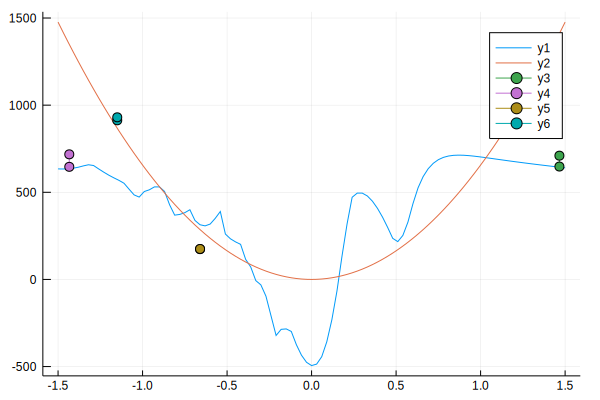

In [36]:
xx = linspace(-1.5, 1.5, 101)
plt = plot(xx, x -> Flux.Tracker.data(net([x, 0, 0, 0]))[])
plot!(plt, xx, x -> (s = [x, 0, 0, 0]; (s - lqrsol.x0)' * lqrsol.S * (s - lqrsol.x0)))
for (x, lb, ub) in all_training_data
    if norm(x[2:end]) < 1e-1
        plot!(plt, [x[1], x[1]], [lb, ub], marker=:dot, markersize=5)
    end
end
plt

In [ ]:
x0 = nominal_state(robot)
data = map(linspace(-1.5, 1.5, 51)) do x
    set_configuration!(x0, [x, 0])
    r = LearningMPC.run_mpc(x0, environment(robot), params, lqrsol, [lqrsol])
    (x, r.mip.objective_bound, r.mip.objective_value)
end;

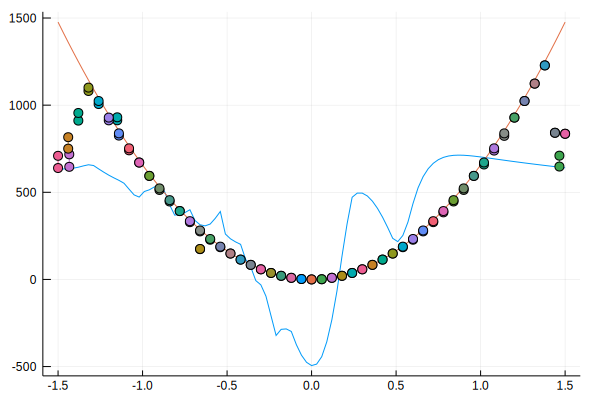

In [40]:
xx = linspace(-1.5, 1.5, 101)
plt = plot(xx, x -> Flux.Tracker.data(net([x, 0, 0, 0]))[], legend=false)
plot!(plt, xx, x -> (s = [x, 0, 0, 0]; (s - lqrsol.x0)' * lqrsol.S * (s - lqrsol.x0)))
for (x, lb, ub) in all_training_data
    if norm(x[2:end]) < 1e-1
        plot!(plt, [x[1], x[1]], [lb, ub], marker=:dot, markersize=5)
    end
end
for (x, lb, ub) in data
    plot!(plt, [x[1], x[1]], [lb, ub], marker=:dot, markersize=5)
end

plt

In [30]:
playback(mvis, results, params.Δt)